In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn # 'n'eural 'n'etworks <- PyTorch's building blocks for neural networks

torch.__version__

'2.3.1'

<br>
<br>

# 1. Preparing the dataset

In [2]:
torch.arange(0, 1, 0.02) # array of range

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [3]:
torch.arange(0, 1, 0.02).reshape(-1, 1) # 모양을 다시 바꾸다 (like numpy)

# torch.arange(0, 1, 0.02).unsqueeze(dim=1) # index 번호 기준 1번 위치의 차원(2번째 차원)으로 1개 차원을 추가

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
X = torch.arange(0, 1, 0.02).reshape(-1, 1)

In [5]:
weight = 0.7 # <- 모델이 Gradient descent로 찾아낼 parameter 
bias = 0.3   # <- 모델이 Gradient descent로 찾아낼 parameter 

y = weight * X + bias

In [6]:
print(X[:5])
print(y[:5])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42) 

In [8]:
def scatter_predictions(X_train=X_train, y_train=y_train, 
                        X_test=X_test, y_test=y_test, 
                        y_predicted=None):
    
    plt.figure(figsize=(10, 7), dpi=100) # figure size & dot per inch

    # train data
    plt.scatter(X_train, y_train, c="black", s=3, label="Train data") # 산점도 (Scatter plots)

    # test data
    plt.scatter(X_test, y_test, c="blue", s=10, label="Test data")

    if y_predicted is not None:
        plt.scatter(X_test, y_predicted, c="red", s=20, label="Predictions")

    plt.legend(prop={"size": 14})

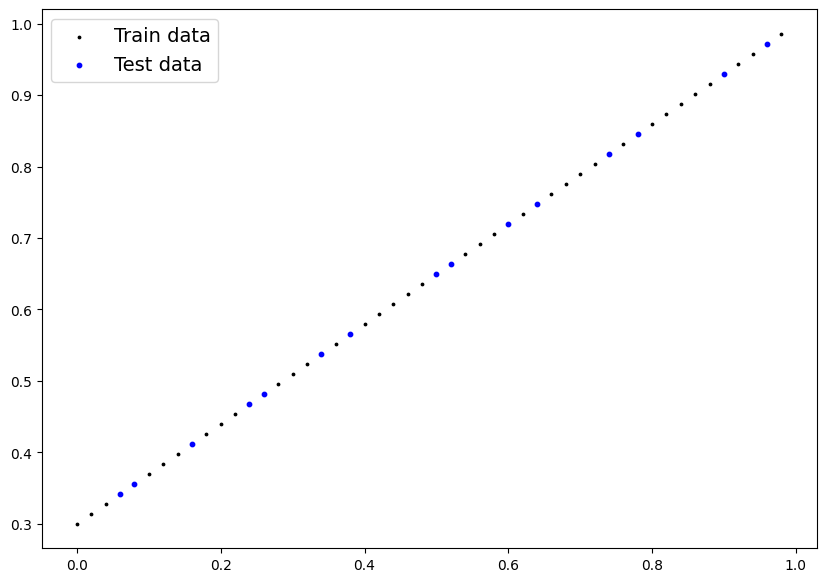

In [9]:
scatter_predictions()

<br>
<br>

# 2. Build the model (Linear Regression)

<br>

## Pytorch Cheet sheet @ https://pytorch.org/tutorials/beginner/ptcheat.html

<hr>
<br>

#### torch.**nn** <br><br> :	 계산 그래프(computational graphs)를 만들기 위한 모든 building blocks (**layers**) 를 포함
<br>

<hr>
<br>

#### torch.**nn.Module** <br><br> : 모든 인공신경망 구조를 위한 기본 클래스. <br><br>  PyTorch 에서 인공신경망을 만들 때에는 **언제나 nn.Module 클래스를 상속받아 모델의 클래스를 만들어야 함**<br><br>+ **"forward()" 메서드를 필수로 재정의(override)**해주어야 함
<br>

<hr>
<br>

#### torch.**nn.Parameter**<br><br> : nn.Module 에서 활용되는 tensor들을 저장 <br><br>  [ **requires_grad=True** ] 가 설정되어 있을 경우 자동으로 gradients 를 계산 (== "autograd")
<br>

<hr>
<br>

#### method "**forward()**"	: nn.Module 클래스를 상속받은 모든 클래스(우리가 만들 모델의 클래스)들은 forward() 메서드를 재정의(override)해주어야 함 <br><br> (forward computation에 대한 정의)
<br>

<hr>
<br>

#### torch.**optim** : 다양한 Optimizer 들을 포함
<br>

<hr>
<br>

In [10]:
class LinearRegressionModel(nn.Module): # nn.Module == neural network lego blocks
    
    def __init__(self): # 생성자 함수 (Constructor)
        
        super().__init__() # 상속받은 nn.Module 클래스의 생성자 함수 호출
        
        # Parameter 초기화를 위한 세팅
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # Parameter 생성 (requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))    # Parameter 생성 (requires_grad=True)
        
        # requires_grad=True (default == False) : update this value with gradient descent
        # PyTorch's default float type is "float32" (preferable)
        

    # def forward(self, x: torch.Tensor) -> torch.Tensor: 
    def forward(self, x): # 순방향 전파 (Forward pass)
        
        return self.weights * x + self.bias # y = ax + b

<br>
<br>

# 3. Initialize the model 

In [11]:
torch.manual_seed(42) # "Manually" set the "seed" for [ nn.Parameter ]

In [12]:
model = LinearRegressionModel() # 모델 초기화 

In [13]:
# 초기화가 된 parameter theta - 1

list(model.parameters()) # 모델에 포함된 "Parameters" 조회

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# 초기화가 된 parameter theta - 2

model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# with torch.no_grad(): # older version of PyTorch
with torch.inference_mode(): # Set "inference mode"
    
    y_predicted = model(X_test) # 순방향 전파 (Forward pass)

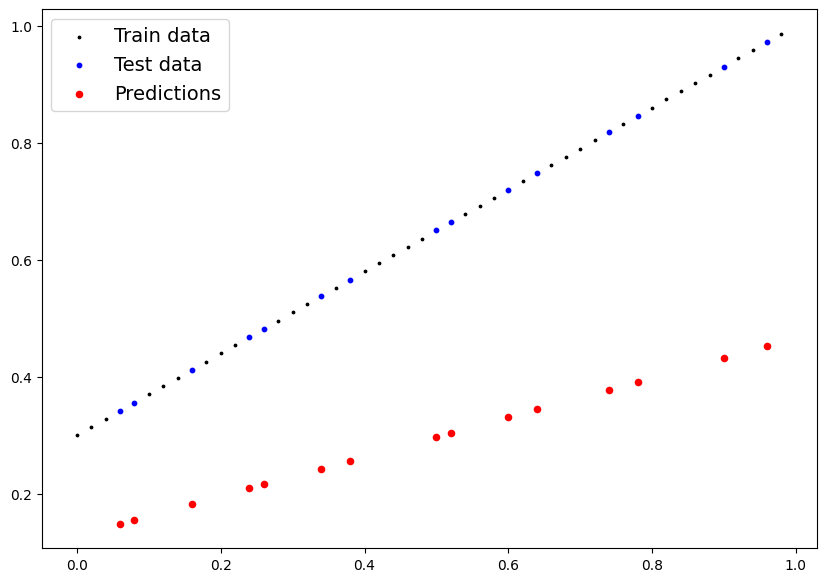

In [16]:
scatter_predictions(y_predicted=y_predicted)

<br>
<br>

# 4. Train the model 

In [ ]:
# # Activations @ https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

# torch.nn.ReLU
# torch.nn.ELU 
# torch.nn.PReLU 
# torch.nn.LeakyReLU
# torch.nn.Sigmoid 
# torch.nn.Tanh 
# torch.nn.Softmax

# # RReLu, SELU, CELU, GELU, ReLU6, 
# # Threshold, Hardshrink, HardTanh,LogSigmoid, Softplus, SoftShrink,
# # Softsign, TanhShrink, Softmin, Softmax2d, LogSoftmax, AdaptiveSoftmaxWithLoss

In [ ]:
# # Cost Functions @ https://pytorch.org/docs/stable/nn.html#loss-functions

# torch.nn.L1Loss == MAE
# torch.nn.MSELoss == MSE 
# torch.nn.CrossEntropyLoss == Multi-class CrossEntropy
# torch.nn.BCELoss == Binary-CrossEntropy
# torch.nn.BCEWithLogitsLoss == Sigmoid layer + torch.nn.BCELoss @ https://bit.ly/3AbUSR9

# # CTCLoss, NLLLoss, PoissonNLLLoss, KLDivLoss, MarginRankingLoss, HingeEmbeddingLoss, MultiLabelMarginLoss, 
# # SmoothL1Loss, SoftMarginLoss, MultiLabelSoftMarginLoss, CosineEmbeddingLoss, MultiMarginLoss, TripletMarginLoss

In [ ]:
# # Optimizers @ https://pytorch.org/docs/stable/optim.html

# torch.optim.SGD
# torch.optim.Adam
# torch.optim.RAdam
# torch.optim.AdamW
# torch.optim.Adagrad
# torch.optim.Adadelta
# torch.optim.RMSprop

# # SparseAdam, Adamax, ASGD, LBFGS, Rprop

In [17]:
torch.manual_seed(42) # "Manually" set the "seed" for [ nn.Parameter ]

model = LinearRegressionModel() # 모델 초기화 

loss_fn = nn.MSELoss() # Mean squared error

optimizer = torch.optim.Adam(params=model.parameters(), # "parameters" to optimize (apply gradient descent)
                             lr=0.01) # "l"earning "r"ate 

In [18]:
train_losses = []
test_losses = []

for epoch in range(100): # epochs == 100

    # 모델을 training mode로 설정 (default state)
    model.train() 
    
    y_predicted = model(X_train) # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
    
    train_loss = loss_fn(y_predicted, y_train) # 2. Training cost 계산 (Cost function 계산)
    
    optimizer.zero_grad() # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
    
    train_loss.backward() # 4. Back-propagation ("Backward" propagation)

    optimizer.step() # 5. Gradient descent 진행 (Take a "step" to update parameters)

    
    # 모델을 evaluation mode로 설정
    model.eval()

    with torch.inference_mode(): # Set "inference mode"
        
        y_predicted = model(X_test) # (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        
        test_loss = loss_fn(y_predicted, y_test.type(torch.float)) # Test cost 계산 (y_test 역시도 동일한 type으로 type-casting)

        if epoch % 10 == 0:
            train_losses.append(train_loss.detach().numpy()) # detach() : 기존 Tensor에서 gradient 전파가 안되는 Tensor 생성 (backward 적용 X, https://bit.ly/3g9dTNt)
            test_losses.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train MSE : {train_loss} | Test MSE : {test_loss}")

Epoch: 0 | Train MSE : 0.13457220792770386 | Test MSE : 0.11861804127693176
Epoch: 10 | Train MSE : 0.047810107469558716 | Test MSE : 0.03970817103981972
Epoch: 20 | Train MSE : 0.008682653307914734 | Test MSE : 0.0063242255710065365
Epoch: 30 | Train MSE : 0.0012723570689558983 | Test MSE : 0.0012832541251555085
Epoch: 40 | Train MSE : 0.002298720646649599 | Test MSE : 0.002411391818895936
Epoch: 50 | Train MSE : 0.0017212432576343417 | Test MSE : 0.001661107991822064
Epoch: 60 | Train MSE : 0.0009067069040611386 | Test MSE : 0.0008533020154573023
Epoch: 70 | Train MSE : 0.0007432317943312228 | Test MSE : 0.0006821426213718951
Epoch: 80 | Train MSE : 0.0006369306356646121 | Test MSE : 0.0005742000648751855
Epoch: 90 | Train MSE : 0.0004997766809538007 | Test MSE : 0.00046104416833259165


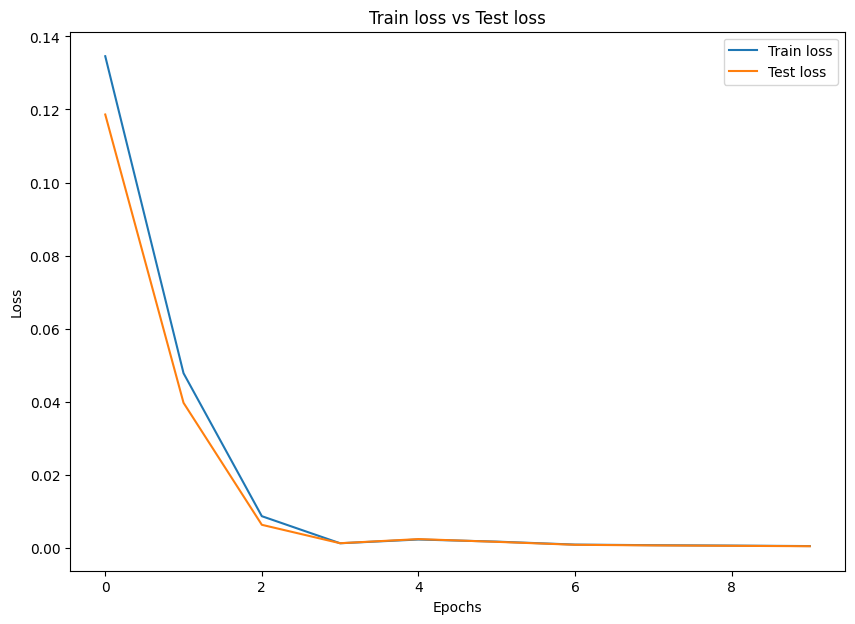

In [19]:
x_values = np.arange(len(train_losses)) # array of range

plt.figure(figsize=(10, 7), dpi=100)

plt.plot(x_values, train_losses, label="Train loss")
plt.plot(x_values, test_losses, label="Test loss")

plt.title("Train loss vs Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()

<br>
<br>

# 5. Test the model 

In [20]:
# 1. 모델을 evaluation mode로 설정
model.eval()

# 2. inference mode 세팅
with torch.inference_mode():
    
    # 3. 모델과 데이터는 동일한 디바이스 위에 있어야 함 (GPU or CPU)
    y_predicted = model(X_test) # (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
    
    # # GPU 활용 시
    # model.to(device)
    # X_test = X_test.to(device)
    # y_predicted = model(X_test)

In [21]:
y_predicted

tensor([[0.5025],
        [0.8317],
        [0.7177],
        [0.9076],
        [0.5532],
        [0.9456],
        [0.6671],
        [0.6544],
        [0.7431],
        [0.5785],
        [0.4899],
        [0.3886],
        [0.8064],
        [0.4392],
        [0.3759]])

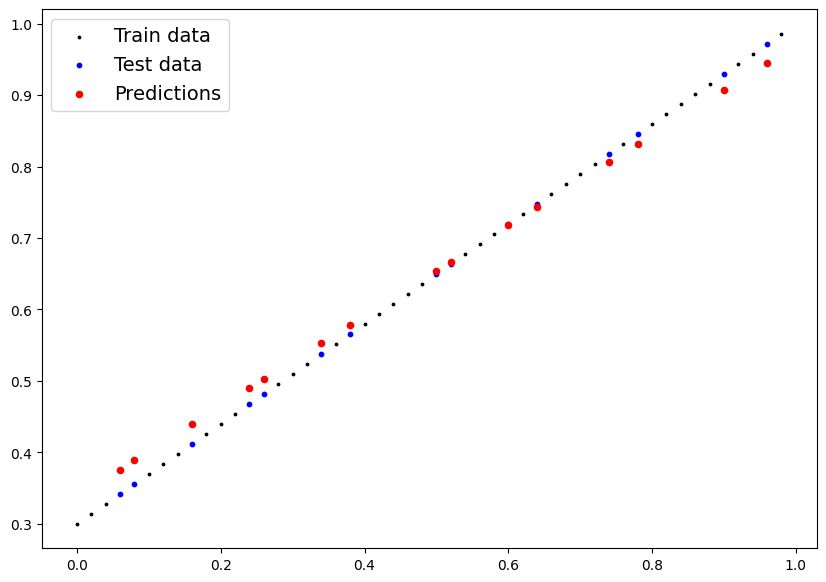

In [22]:
scatter_predictions(y_predicted=y_predicted)

In [23]:
cost = loss_fn(y_predicted, y_test.type(torch.float)) # y_test 역시도 동일한 type으로 type-casting

cost.item() # Tensor로부터 값(item) 꺼내기 (Test MSE)

0.00038936955388635397

In [24]:
# 데이터 준비 시 활용했던 original params

print(weight)
print(bias)

0.7
0.3


In [25]:
# 학습이 마쳐진 parameters

model.state_dict()

OrderedDict([('weights', tensor([0.6330])), ('bias', tensor([0.3380]))])

<br>
<br>

# (Appendix 1) Save & Load the model

<hr>
<br>

#### torch.**save** <br><br> :	다양한 객체를 pickle 파일로 저장 (models, tensors, python objects like dicts)
<br>

<hr>
<br>

#### torch.**load** <br><br> :	다양한 객체를 pickle 파일로부터 로딩 (models, tensors, python objects like dicts) & 로딩 시 적재될 device도 결정 가능 (CPU, GPU, etc)
<br>

<hr>
<br>

#### torch.**nn.Module.load_state_dict** <br><br> :	저장된 **model.state_dict()** 파일로부터 모델 파라미터 값들을 로딩
<br>

<hr>
<br>

<br>
<br>

### 1) **Save**

<br>

#### 모델을 통째로 저장하고 불러오는 것도 가능 @ https://pytorch.org/tutorials/beginner/saving_loading_models.html

#### -> **torch.save(model, PATH)** & **model = torch.load(PATH)**

In [26]:
# Shorter version

torch.save(obj=model.state_dict(), # only parameters
           f='models/linear_regression_01.pth')

In [ ]:
# # Longer version (디렉토리부터 생성)


# # 1. 모델 파라미터 파일 저장을 위한 디렉토리 생성 (os.mkdir 함수로 대체하여 사용 가능)

# from pathlib import Path
# MODEL_PATH = Path("models")
# MODEL_PATH.?(parents=True, exist_ok=True) # make directory
# # parents=True : any missing parents of this path are created as needed.
# # exist_ok=True : FileExistsError exceptions will be ignored.


# # 2. 모델 파라미터 저장경로 지정 

# MODEL_NAME = "linear_regression_01.pth" # common convention for PyTorch saved models or objects : .pt or .pth
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # WindowsPath('models/linear_regression_01.pth')


# # 3. 모델 파라미터 저장

# print('Saving model to :', MODEL_SAVE_PATH)

# torch.save(obj=model.state_dict(), # only parameters
#            f=MODEL_SAVE_PATH)

Saving model to : models\linear_regression_01.pth


<br>
<br>

### 2) **Load**

In [27]:
loaded_model = LinearRegressionModel() # 모델 구조 생성 

loaded_model.load_state_dict(torch.load(f='models/linear_regression_01.pth')) 
# pickle 파일을 먼저 "load" 후 paramter 값들을 꺼내어 모델로 load ("load" the "state_dict")

<All keys matched successfully>

In [28]:
# 1. 모델을 evaluation mode로 설정
loaded_model.eval() 

# 2. inference mode 세팅
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [29]:
cost = loss_fn(loaded_model_preds, y_test.type(torch.float)) # y_test 역시도 동일한 type으로 type-casting

cost.item() # Test MSE

0.00038936955388635397

In [30]:
y_predicted == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

<br>
<br>

# (Appendix 2) Using GPUs
<br>

### Colab (GPU로 런타임 변경 필요) 혹은 Nvidia GPU가 있는 로컬환경에서 실행해주세요. 
#### (PyTorch installation guide @ https://pytorch.org/get-started/locally/)

In [31]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.__version__

'2.3.1'

In [32]:
X = torch.arange(0, 1, 0.02).reshape(-1, 1)

weight = 0.7 # <- 모델이 Gradient descent로 찾아낼 parameter 
bias = 0.3 # <- 모델이 Gradient descent로 찾아낼 parameter 

y = weight * X + bias


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42) 

In [33]:
class LinearRegressionModel(nn.Module):
    
    
    def __init__(self):
        
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # "Linear" model (y = ax + b)
        # self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        # self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        
    def forward(self, x): # 순방향 전파 (Forward pass)
        
        return self.linear_layer(x) # y = ax + b
        # return self.weights * x + self.bias # y = ax + b

In [34]:
torch.manual_seed(42) # for [ nn.Parameter ]

model = LinearRegressionModel() # 모델 초기화 

loss_fn = nn.MSELoss() # Mean squared error

optimizer = torch.optim.Adam(params=model.parameters(), # "parameters" to optimize (apply gradient descent)
                             lr=0.01) # learning rate 

In [35]:
# Put the model & parameters on GPU

device = "mps" if torch.backends.mps.is_available() else "cpu" # 사용 가능하다면 (If available)
print("Using device : ", device)

model.to(device) # 모델을 device"로"

Using device :  mps


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
# 모델을 GPU 위에 올려서 활용할 경우 데이터도 GPU 위에 올려줘야 합니다.

X_train = X_train.to(device) # 데이터를 device"로"
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(100): # epochs == 100

    # 모델을 training mode로 설정
    model.train() 
    
    y_predicted = model(X_train) # (x 데이터를 모델에 넣고) 순방향 전파
    
    train_loss = loss_fn(y_predicted, y_train) # Training cost 계산
    
    optimizer.zero_grad() # grad 값을 0으로 초기화
    
    train_loss.backward() # 에러를 뒤쪽(backward)으로 전파(propagation)
    
    optimizer.step() # Gradient descent "step"
    
    
    # 모델을 evaluation mode로 설정
    model.eval()

    with torch.inference_mode():
        
        y_predicted = model(X_test) 
        
        test_loss = loss_fn(y_predicted, y_test.type(torch.float)) 
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train MSE : {train_loss} | Test MSE : {test_loss}")

Epoch: 0 | Train MSE : 0.31617867946624756 | Test MSE : 0.29839491844177246
Epoch: 10 | Train MSE : 0.1715792715549469 | Test MSE : 0.1605445295572281
Epoch: 20 | Train MSE : 0.0778036043047905 | Test MSE : 0.07226549088954926
Epoch: 30 | Train MSE : 0.029186181724071503 | Test MSE : 0.027156440541148186
Epoch: 40 | Train MSE : 0.011117120273411274 | Test MSE : 0.010560509748756886
Epoch: 50 | Train MSE : 0.007230356801301241 | Test MSE : 0.006867788732051849
Epoch: 60 | Train MSE : 0.006859942805022001 | Test MSE : 0.006348811089992523
Epoch: 70 | Train MSE : 0.0063605052419006824 | Test MSE : 0.005827686283737421
Epoch: 80 | Train MSE : 0.0056063211522996426 | Test MSE : 0.00518250185996294
Epoch: 90 | Train MSE : 0.004944992251694202 | Test MSE : 0.004639407154172659


In [37]:
model.eval()

with torch.inference_mode():
    
    y_predicted = model(X_test)
    
cost = loss_fn(y_predicted, y_test.type(torch.float))

cost.item() # CPU & GPU 차이로 인해 결과 상 근소한 차이가 발생 (seed를 세팅하여도 발생하는 차이)

0.004218820948153734